# **FULL DATA INTERPRETATION**

# 1. DATA EXTRACTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
alt.data_transformers.disable_max_rows()

pd.options.display.float_format = '{:.2f}'.format #So the numbers will not appear in a scientific format

**The data has been extracted from a private Data Management Platforms which had a limitation in the days I could download, so I had to divide the download into 5 chunks of data.**

**This is the concatenation of the 5 datasets that shows the data of the last 12 months, from 9/1/2019 to 8/31/2020.**

**The first column is a date, so I´ll directly use parse_dates when I charge the chunks**



In [2]:
chunk1=pd.read_csv("DATA/Data from September 2019 to October 2019.csv", thousands='.',parse_dates=['Time'])
chunk2=pd.read_csv("DATA/Data From October 2019 to Jan 2020.csv", thousands='.',parse_dates=['Time'])
chunk3=pd.read_csv("DATA/Data From Jan to April 2020.csv", thousands='.',parse_dates=['Time'])
chunk4=pd.read_csv("DATA/Data From April to July 2020.csv", thousands='.',parse_dates=['Time'])
chunk5=pd.read_csv("DATA/Data from July 2020 to September 2020.csv", thousands='.',parse_dates=['Time'])
print('Shapes of each chunk: ',chunk1.shape, chunk2.shape, chunk3.shape, chunk4.shape,chunk5.shape)

daily_data = pd.concat([chunk1,chunk2,chunk3,chunk4,chunk5])
print('Shape of the whole dataset:', daily_data.shape)

display(daily_data.sample(5))
daily_data.isnull().sum()

Shapes of each chunk:  (99215, 22) (185523, 22) (222676, 22) (241940, 22) (170071, 22)
Shape of the whole dataset: (919425, 22)


,Time,Domain,Opportunities,Format Loads,Format Fill Rate,Impressions,Viewable Impressions,Viewability Measured Impressions,Viewability Rate,Fill Rate,...,Cost,Profit,Revenue,Profit Margin,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
122259,2020-08-14,decibo.com,823,96,7.29%,7,5,7,71.43%,0.85%,...,$0.00648,$0.00972,$0.0162,60.00%,0,0.00%,28.57%,14.29%,14.29%,14.29%
110253,2020-02-16,princesstyra.blog,6,4,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
118225,2020-08-13,meutricolor.net.br,"6,333","1,114",16.61%,185,173,185,93.51%,2.92%,...,$0.111,$0.1665,$0.2775,60.00%,0,0.00%,88.65%,77.84%,67.57%,59.46%
39991,2020-07-16,lotero.com,145,38,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
46964,2019-10-25,cheservizi.it,0,26,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%


Time                                     0
Domain                                 366
Opportunities                            0
Format Loads                         50354
Format Fill Rate                     50354
Impressions                              0
Viewable Impressions                     0
Viewability Measured Impressions         0
Viewability Rate                    479243
Fill Rate                                0
Efficiency Rate                          0
CPM                                      0
Cost                                     0
Profit                                   0
Revenue                                  0
Profit Margin                            0
Clicks                                   0
CTR                                      0
25% View Rate                            0
50% View Rate                            0
75% View Rate                            0
100% View Rate                           0
dtype: int64

# 2. DATA CLEANING

- **Missing values:**

I drop all the Domains that don´t have info about the format Loads (traffic of the website) and the Domain (the website). With the filters I´ll apply later the Null values of the Viewability Rate will be automacillay rejected

In [3]:
daily_data = daily_data.dropna(subset =['Format Loads','Format Fill Rate', 'Domain'])

- **Dropping the columns that I won´t need in the project**

The following columns are redundant or don´t add value to the advertisers, these are valuable metrics for the Data Management Platforms, but I want to focus the project in the advertiser needs.


In [4]:
daily_data.drop(['Opportunities','Viewable Impressions','Viewability Measured Impressions','Fill Rate', 'Cost','Profit',
           'Revenue','Profit Margin'],axis=1, inplace=True)

In [5]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868705 entries, 0 to 170070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              868705 non-null  datetime64[ns]
 1   Domain            868705 non-null  object        
 2   Format Loads      868705 non-null  object        
 3   Format Fill Rate  868705 non-null  object        
 4   Impressions       868705 non-null  object        
 5   Viewability Rate  420639 non-null  object        
 6   Efficiency Rate   868705 non-null  object        
 7   CPM               868705 non-null  object        
 8   Clicks            868705 non-null  object        
 9   CTR               868705 non-null  object        
 10  25% View Rate     868705 non-null  object        
 11  50% View Rate     868705 non-null  object        
 12  75% View Rate     868705 non-null  object        
 13  100% View Rate    868705 non-null  object        
dtypes: d

**Clearly we to have to convert all those objetc columns into numeric columns:**
- **1: Converting columns with ' , ' into integers**
- **2: Converting columns with '%' , '$' and ',' into floats**

In [6]:
#1
daily_data['Format Loads'] = daily_data['Format Loads'].str.replace(",", "").astype(int)
daily_data['Impressions'] = daily_data['Impressions'].str.replace(",", "").astype(int)
daily_data['Clicks'] = daily_data['Clicks'].str.replace(",", "").astype(int)

#2
daily_data['Format Fill Rate'] = daily_data['Format Fill Rate'].str.replace("%", "").astype(float)
daily_data['Viewability Rate'] = daily_data['Viewability Rate'].str.replace("%", "").astype(float).fillna(0)
daily_data['Efficiency Rate'] = daily_data['Efficiency Rate'].str.replace("%", "").astype(float)
daily_data['CPM'] = daily_data['CPM'].str.replace("$", "").astype(float)
daily_data['CTR'] = daily_data['CTR'].str.replace("%", "").astype(float)
daily_data['25% View Rate'] = daily_data['25% View Rate'].str.replace("%", "").astype(float)
daily_data['50% View Rate'] = daily_data['50% View Rate'].str.replace("%", "").astype(float)
daily_data['75% View Rate'] = daily_data['75% View Rate'].str.replace("%", "").astype(float)
daily_data['100% View Rate'] = daily_data['100% View Rate'].str.replace("%", "").astype(float)

display(daily_data.isnull().sum())

Time                0
Domain              0
Format Loads        0
Format Fill Rate    0
Impressions         0
Viewability Rate    0
Efficiency Rate     0
CPM                 0
Clicks              0
CTR                 0
25% View Rate       0
50% View Rate       0
75% View Rate       0
100% View Rate      0
dtype: int64

In [7]:
print(len(daily_data['Domain'].unique()))

29046


- **We have 29046 Domains, but as we´ll see later, there are a lot of residuals domains that I´ll filter**

## DATAFRAME GROUPBY_DOMAINS

- **I´m going to create a new DataFrame grouping by Domain, and calculating the mean of each variable based on the daily data of the last 12 months.**
- **This will be the main dataframe of the project,  I´ll  use it later to apply clustering, and divide the Domains into different groups.**

In [8]:
groupby_domains = daily_data.groupby(['Domain']).agg({'Format Loads':np.mean,
                                'Impressions':np.mean,
                                'Format Fill Rate':np.mean,
                                'Viewability Rate':np.mean,
                                'Efficiency Rate':np.mean,
                                'CPM':np.mean,
                                'Clicks':np.mean,
                                'CTR':np.mean,
                                '25% View Rate':np.mean,
                                '50% View Rate':np.mean,
                                '75% View Rate':np.mean,
                                '100% View Rate':np.mean
                                }).sort_values( by= 'Format Loads',ascending=False).reset_index()
print(groupby_domains.shape)
groupby_domains.head(5)

(29046, 13)


,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,memurlar.net,2739246.93,8942.44,0.60,83.80,92.72,1.59,46.82,0.46,79.04,67.91,59.93,53.49
1,missyusa.com,1732798.15,124798.83,10.81,78.07,98.47,1.71,98.44,0.07,75.42,62.05,53.22,46.50
2,bitbol.la,1054934.05,34032.09,3.77,86.47,89.51,1.44,145.27,0.39,77.80,68.07,59.96,51.46
3,youm7.com,992087.95,11080.76,1.14,61.26,91.52,1.73,48.46,0.40,77.01,67.45,60.84,55.42
4,chinatimes.com,990576.14,188611.01,19.54,90.05,99.14,1.80,1311.98,0.79,81.11,71.88,65.04,58.62


### **THRESHOLD APPLIED**: 
- **I´ll keep the domains with a mean of more than 20000 Format Loads. It´s the chosen filter to consider a domain representative and the way to drop the residuals**


In [9]:
groupby_domains = groupby_domains[groupby_domains['Format Loads']>20000]
print(f"After this filtering, we have {len(groupby_domains['Domain'].unique())} domain remain.")

After this filtering, we have 901 domain remain.


In [10]:
# Keeping also in the daily_data DF only the 901 domains selected
domains_filtered = groupby_domains['Domain']
daily_data = daily_data.merge(domains_filtered, on='Domain',how='inner',right_index=True ).reset_index(drop=True)
print(len(daily_data['Domain'].unique()))


901


**After this basic filtering, we keep the 901 observations. Those are the domains that I am going to work with.**

# 3. DATA ENGINEERING

### ***ADDING THE CATEGORY OF THE DOMAIN, AND THE RELATIVE IMPORTANCE OF EACH CATEGORY***

-**I´ll read another table with other kind of information, but the one I´m interested in is the column with the Category of each Domain**

In [12]:
categories = pd.read_csv('DATA/Index Exchange Quality Inventory Mapping - Existing Acccount-Reseller-Domains - Compliance.csv')
categories.columns = ['Unnamed: 0', 'Partner/Seller Name', 'Partner/Seller ID',
       'Inventory Relationship\n(select from dropdown)', 'Domain',
       'Category', 'Monthly Volume', 'Ad Formats',
       'Banner/Player Dimensions']

print(len(categories['Category'].unique()), 'categories')
display(categories[['Domain','Category']].head(5))


52 categories


,Domain,Category
0,larepublica.pe,News & Portals > Newspapers
1,clicrbs.com.br,News & Portals > Newspapers
2,biobiochile.cl,News & Portals > Newspapers
3,cifraclub.com.br,Music & Radio > General
4,purepeople.com.br,Glamour > Beauty


- **We have 52 differente categories. In order to simplify the analysis, I´ll transform the column to drop the subcategories, the one after the >.**

In [13]:
import re
pattern = '>'
renamed_categories = []
for string in categories['Category']:
    text = string
    match = re.search(pattern, text)
    s = match.start()
    renamed_categories.append(string[:s])
categories['Category'] = categories['Category'].replace(categories['Category'].values, renamed_categories )
categories['Category'] = categories['Category'].map(lambda x: x.strip()) # to reomve the blank space in the end of the strings

print('After the transformation we have ',len(categories['Category'].unique()), 'categories:')
print(categories['Category'].unique())

After the transformation we have  19 categories:
['News & Portals' 'Music & Radio' 'Glamour' 'Food' 'Sports'
 'Health & Wellness' 'Community & Culture' 'Movies & Television'
 'Education & Careers' 'Money & Investing' 'B-to-B' 'Leisure' 'Home'
 'Tech & Gaming' 'Family & Parenting' 'Casual Games' 'Travel' 'Shopping'
 'Autos']


- **I´ll take advantage of this dataframe and other of its columns, the Monthly Volumne by Category, this is the monthly traffic or Format Loads by category, to create another column with the relative importance that the Category has over the rest.**

In [14]:
categories_importance = pd.DataFrame(categories.groupby('Category')['Monthly Volume'].sum().sort_values(ascending=False).reset_index())

total_formatloads = categories_importance['Monthly Volume'].sum()
categories_importance['Category importance'] = categories_importance['Monthly Volume'].apply(lambda x: (x/total_formatloads)*100)

domains_categories_importance = categories.merge(categories_importance, on='Category')
domains_categories_importance = domains_categories_importance[['Domain','Category','Category importance']]

display(groupby_domains.merge(domains_categories_importance, on='Domain', how ='left'))
display(groupby_domains.merge(domains_categories_importance, on='Domain', how ='left').isnull().sum())

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,memurlar.net,2739246.93,8942.44,0.60,83.80,92.72,1.59,46.82,0.46,79.04,67.91,59.93,53.49,Health & Wellness,2.08
1,missyusa.com,1732798.15,124798.83,10.81,78.07,98.47,1.71,98.44,0.07,75.42,62.05,53.22,46.50,News & Portals,58.61
2,bitbol.la,1054934.05,34032.09,3.77,86.47,89.51,1.44,145.27,0.39,77.80,68.07,59.96,51.46,NaN,nan
3,youm7.com,992087.95,11080.76,1.14,61.26,91.52,1.73,48.46,0.40,77.01,67.45,60.84,55.42,News & Portals,58.61
4,chinatimes.com,990576.14,188611.01,19.54,90.05,99.14,1.80,1311.98,0.79,81.11,71.88,65.04,58.62,News & Portals,58.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,laprensa.com.ni,20347.50,29.70,0.13,82.75,12.14,1.89,0.05,0.10,75.50,67.71,64.67,59.26,NaN,nan
899,financasnews.com,20326.96,59.98,0.20,60.82,64.21,1.25,0.10,0.05,59.85,49.28,38.57,26.63,NaN,nan
900,elmundo.es,20220.81,2125.87,13.72,78.17,88.94,1.70,3.25,0.20,76.64,69.74,65.55,61.48,NaN,nan
901,critch-comedy.de,20168.33,231.00,1.14,98.28,99.92,1.59,0.00,0.00,94.39,86.90,76.40,69.62,NaN,nan


Domain                   0
Format Loads             0
Impressions              0
Format Fill Rate         0
Viewability Rate         0
Efficiency Rate          0
CPM                      0
Clicks                   0
CTR                      0
25% View Rate            0
50% View Rate            0
75% View Rate            0
100% View Rate           0
Category               493
Category importance    493
dtype: int64

In [15]:
category_nans = groupby_domains.merge(domains_categories_importance, on='Domain', how ='left')
category_nans = category_nans[category_nans['Category'].isnull()][['Domain','Category']]
#category_nans.to_csv('Category_NANS.csv')

##### **The categories dataframe is not updated and there are 493 domains that are not on it. I consider the Category column could add value to the final model, so I don´t want NANs on it. Because of that I´m gonna manually introduce the category in the Domains without it to have this column filled, and then I´ll merge this with the main DataFrames**

In [16]:
#Reading the dataframe with the Nans manually added
groupby_domains_NANs_corrected = pd.read_csv('DATA/Category NANS corrected.csv', usecols=['Domain','Category'])

#Adding to this dataframe the category importance columns
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected.merge(categories_importance, on='Category')
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected[['Domain','Category','Category importance']]

#Merging with the dataframe with the domains that didn´t have null category
categories_by_importance_complete = domains_categories_importance.merge(groupby_domains_NANs_corrected, how = 'outer')

#Merging with the main dataframes
daily_data = daily_data.merge(categories_by_importance_complete, on='Domain', how='left').set_index('Time')
groupby_domains = groupby_domains.merge(categories_by_importance_complete, on='Domain', how ='left')

display(daily_data.head(1))
display(groupby_domains.head(1))
groupby_domains.isnull().sum()

,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
Time,,,,,,,,,,,,,,,
2019-09-01,dagens.dk,5701,9.61,548,88.68,73.07,1.76,5,0.91,79.74,66.42,56.02,50.36,News & Portals,58.61


,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,memurlar.net,2739246.93,8942.44,0.60,83.80,92.72,1.59,46.82,0.46,79.04,67.91,59.93,53.49,Health & Wellness,2.08


Domain                 0
Format Loads           0
Impressions            0
Format Fill Rate       0
Viewability Rate       0
Efficiency Rate        0
CPM                    0
Clicks                 0
CTR                    0
25% View Rate          0
50% View Rate          0
75% View Rate          0
100% View Rate         0
Category               0
Category importance    0
dtype: int64

In [17]:
print(groupby_domains.shape)
groupby_domains = groupby_domains.drop_duplicates(subset=['Domain'], keep='first').reset_index(drop=True)
groupby_domains.shape

(907, 15)


(901, 15)

- **I´ll check if there´s much difference between the category importance calculated from the given table, and the category importance calculated from the updated data, with the values of the 493 domains that didn´t have Category assigned included.**

In [18]:
total_volume = daily_data.groupby('Category')['Format Loads'].sum().sum()
totals_per_category =daily_data.groupby('Category')['Format Loads'].sum()

categories_importance_updated = pd.DataFrame((totals_per_category/total_volume)*100).reset_index()
categories_importance_updated.columns =['Category', 'Updated Category importance' ]

comparison= categories_importance.merge(categories_importance_updated, on='Category')
comparison['Difference'] = comparison['Updated Category importance'] - comparison['Category importance'] 
comparison

,Category,Monthly Volume,Category importance,Updated Category importance,Difference
0,News & Portals,2366000000,58.61,62.42,3.81
1,Sports,308000000,7.63,4.83,-2.80
2,Community & Culture,267000000,6.61,8.04,1.43
3,Music & Radio,227000000,5.62,3.02,-2.60
4,Glamour,192000000,4.76,3.64,-1.11
5,Movies & Television,144000000,3.57,2.65,-0.91
6,Education & Careers,98000000,2.43,1.67,-0.75
7,Health & Wellness,84000000,2.08,3.45,1.37
8,Tech & Gaming,80000000,1.98,4.01,2.03
9,B-to-B,61000000,1.51,0.96,-0.55


- **We can verify there´s no much difference, most of them change less than 2%, so I won´t modify the column**

### ***ADDING A COLUMN WITH THE COUNTRY WHERE THE MAIN TRAFFIC (FORMAT LOADS) OF EACH DOMAIN COMES FROM***

**This is a very important feature that I have to add because one the main advertisers requirements is the countries or regions where the campaign has to be done.**

**I extracted from the internal company online platform a CSV with the traffic divided by country for each of the 901 domains. It´s already ordered by Format Loads so I have only to keep the highest result of each domain.**

*Around 130 Domains didn´t have data about the traffic in the online platform, so I manually added taking the info from https://www.similarweb.com/*



In [19]:
# Loading the nwe dataframe
traffic_by_country = pd.read_csv('DATA/Domains traffic by country.csv', usecols=['Domain', 'Country','Format Loads'])

#Dropping duplicates to keep the country with more traffic for each domain
main_country_by_domain = traffic_by_country.drop_duplicates(subset='Domain', keep='first')[['Country', 'Domain']]

#3Loading the nwe dataframe
groupby_domains = groupby_domains.merge(main_country_by_domain, on='Domain', how='inner')
daily_data = daily_data.reset_index().merge(main_country_by_domain, on='Domain', how='inner').set_index('Time')

display(groupby_domains.head(5))

print(len(groupby_domains['Country'].unique()), ' countries')
groupby_domains['Country'].unique()

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance,Country
0,memurlar.net,2739246.93,8942.44,0.60,83.80,92.72,1.59,46.82,0.46,79.04,67.91,59.93,53.49,Health & Wellness,2.08,Turkey
1,missyusa.com,1732798.15,124798.83,10.81,78.07,98.47,1.71,98.44,0.07,75.42,62.05,53.22,46.50,News & Portals,58.61,United States
2,bitbol.la,1054934.05,34032.09,3.77,86.47,89.51,1.44,145.27,0.39,77.80,68.07,59.96,51.46,Sports,7.63,Peru
3,youm7.com,992087.95,11080.76,1.14,61.26,91.52,1.73,48.46,0.40,77.01,67.45,60.84,55.42,News & Portals,58.61,Egypt
4,chinatimes.com,990576.14,188611.01,19.54,90.05,99.14,1.80,1311.98,0.79,81.11,71.88,65.04,58.62,News & Portals,58.61,Taiwan


68  countries


array(['Turkey', 'United States', 'Peru', 'Egypt', 'Taiwan', 'Brazil',
       'India', 'Romania', 'Mexico', 'Colombia', 'Spain', 'Lebanon',
       'Ecuador', 'Bangladesh', 'France', 'Dominican Republic', 'Poland',
       'Chile', 'Argentina', 'Hong Kong', 'Germany', 'Sweden',
       'Indonesia', 'Saudi Arabia', 'Vietnam', 'United Arab Emirates',
       'Bolivia', 'Indonesa', 'Costa Rica', 'South Korea', 'Panama',
       'Malaysia', 'Pakistan', 'Russia', 'Italy', 'Albania', 'Uruguay',
       'Canada', 'El Salvador', 'Guatemala', 'Venezuela', 'Greece',
       'China', 'Paraguay', 'Czech Republic', 'Nigeria', 'Thailand',
       'United Kingdom', 'Portugal', 'Morocco', 'Japan', 'Denmark',
       'Belgium', 'Qatar', 'Bulgaria', 'Australia', 'Israel', 'Singapore',
       'Ukraine', 'Slovakia', 'Netherlands', 'Puerto Rico', 'Nicaragua',
       'Kuwait', 'Rwanda', 'Honduras', 'Austria', 'Philippines'],
      dtype=object)

- **Indonesia is duplicated (because one of them is bad written), I correct it:**

In [20]:
groupby_domains['Country'] = groupby_domains['Country'].replace('Indonesa', 'Indonesia')
print(len(groupby_domains['Country'].unique()))

67


### ***ADDING A COLUMN TO REPRESENT THE GEOGRAPHICAL ZONE, AND ANOTHER COLUMN WITH ITS RELATIVE IMPORTANCE OR WEIGHT***


In [22]:
south_america = ['Peru', 'Brazil', 'El Salvador', 'Guatemala', 'Venezuela', 'Bolivia', 'Chile', 'Argentina', 'Ecuador',
               'Dominican Republic', 'Colombia', 'Panama', 'Mexico',  'Paraguay', 'Honduras', 'Nicaragua', 'Puerto Rico',
               'Costa Rica', 'Uruguay']

west_europe = ['Turkey', 'Austria', 'Italy', 'United Kingdom', 'Portugal', 'Belgium', 'Spain', 'France',
               'Germany', 'Sweden', 'Netherlands', 'Denmark']

east_europe =['Russia', 'Poland', 'Romania', 'Czech Republic', 'Ukraine', 'Slovakia', 'Bulgaria', 'Albania' ,'Greece']

north_america = ['United States', 'Canada']

asia = ['Taiwan', 'India', 'Hong Kong', 'Indonesia', 'Vietnam', 'Bangladesh', 'Japan', 'China', 'Thailand', 'Israel',
       'South Korea', 'Malaysia', 'Pakistan', 'Singapore', 'Philippines']

africa = ['Egypt', 'Morocco', 'Nigeria', 'Rwanda']

arabia = ['Lebanon', 'Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait']

australia = ['Australia']


groupby_domains['Geographical zone'] = groupby_domains['Country'].copy()
groupby_domains['Geographical zone'] =(groupby_domains['Geographical zone'].replace(south_america, 'South America')
                                       .replace(west_europe,'West Europe').replace(east_europe,'East Europe')
                                       .replace(north_america,'North America').replace(asia,'Asia')
                                       .replace(africa,'Africa').replace(arabia,'Arabia').replace(australia,'Australia'))


#Adding the column to the daily_data dataframe
daily_data = daily_data.reset_index().merge(groupby_domains[['Domain','Geographical zone']], on='Domain', how='inner').set_index('Time')


In [26]:
groupby_domains.groupby('Geographical zone')['Format Loads'].sum().sort_values(ascending=False)

Geographical zone
South America   56384290.76
Asia            17168735.12
West Europe     13177793.79
North America    8886104.29
East Europe      8455577.79
Arabia           2929720.43
Africa           2312945.45
Australia          98810.79
Name: Format Loads, dtype: float64

- **I´ll do something similar to the category importance colum, and I´ll create  the Geographical zone importance based on the weight that each region has in the total traffic.**

In [27]:
groupby_domains['Geographical zone importance'] = groupby_domains['Geographical zone'].copy()
groupby_domains['Geographical zone importance'] = (groupby_domains['Geographical zone'].replace('South America', 53.27 )
                                       .replace('West Europe', 11.98 ).replace('East Europe', 10.43)
                                       .replace('North America', 8.32).replace('Asia', 13.09)
                                       .replace('Africa', 1.10).replace('Arabia', 1.55).replace('Australia', 0.22))

# 4. DATA INTERPRETATION

## RELATIONSHIP BETWEEN VARIABLES

<AxesSubplot:>

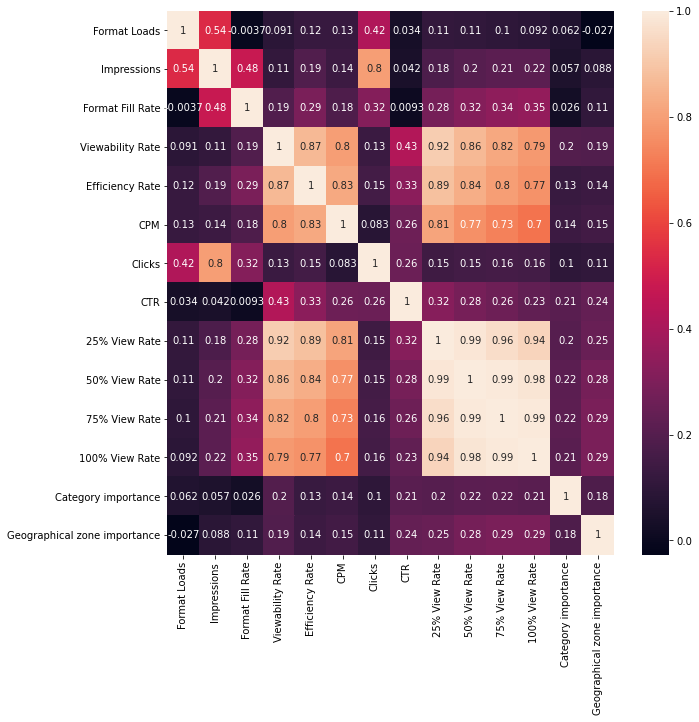

In [28]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(groupby_domains.corr(), annot = True)

- **Only the variables about the View Rate percentages are strongly correlated (more than 90%). I´ll  convert these 4 variables into only one**
- **I decide to only keep the Viewability Rate column, because this variable include in some way the information of the 4 segmented variables**

In [29]:
daily_data.drop(['25% View Rate','50% View Rate' ,'75% View Rate','100% View Rate'],axis=1, inplace=True)
groupby_domains.drop(['25% View Rate' ,'50% View Rate' ,'75% View Rate','100% View Rate'],axis=1, inplace = True)

daily_data = daily_data.round(2) # To make it more readable. I´ll use this dataframe again in the streamlit app

In [6]:
daily_data.to_csv('DATA/Daily Report.csv',index=True)
groupby_domains.to_csv('DATA/Groupby Domains.csv', index=False)

## FEATURE ANALYSIS

In [2]:
daily_data = pd.read_csv('DATA/Daily Report.csv', parse_dates=['Time'])
groupby_domains = pd.read_csv('DATA/Groupby Domains.csv')

### **Explanation of each variable**:

- **Reminder:** The values in the groupby_domains dataframe is the daily mean of each domain taking the data of the last 366 days

In [44]:
groupby_domains.head(1)

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,Category,Category importance,Country,Geographical zone,Geographical zone importance
0,memurlar.net,2739246.93,8942.44,0.60,83.80,92.72,1.59,46.82,0.46,Health & Wellness,2.08,Turkey,West Europe,11.98


- **Domain**: Publisher who wants to monetize his website.

- **Format Loads:** The traffic of the Domain.

- **Impressions:**  The number of times that the ad plays (views).

- **Format Fill Rate (%)**: Impressions / Format Loads. This displays the total fill rate of Format tag loads.

- **Viewability Rate (%):** Percentage of impressions where the video displayed more than 70%.

- **CPM:**  (Cost Per Milli) Cost per one thousand impressions.

- **Clicks:**  The number of clicks in the ad recorded, (when the user goes to the website of the advertiser throught the video).

- **CTR (%):**  (Click Through Rate) Clicks / Impressions.

- **Category:** Category of the domain.

- **Category importance (%):** Percentage which shows the relative weight that the category has over the total traffic 

- **Country:** The country where most traffic of the domain comes from.

- **Geographical zone:** The region of the country.

- **Geographical zone importance:** ** Percentage which shows the relative weight that the geographical zone has over the total traffic 




- ## Format Loads, Impressions and Format Fill Rate interpretation 

#### ***TENDENCIES***

In [79]:
trend_line_formatloads = alt.Chart(daily_data).mark_line(color='black').encode(
    x="yearmonth(Time):T",
    y="mean(Format Loads)",
).properties(
    title="Anual Format Loads tendency",
    height=200,
    width = 500).interactive()

trend_line_impressions = alt.Chart(daily_data).mark_line(color='#F18727').encode(
    x="yearmonth(Time):T",
    y="mean(Impressions)",
).properties(
    title="Anual Impressions tendency",
    height=200,
    width = 500).interactive()

trend_line_formatfillrate = alt.Chart(daily_data).mark_line(color='green').encode(
    x="yearmonth(Time):T",
    y="mean(Format Fill Rate)",
).properties(
    title="Anual Format Loads Rate tendency",
    height=200,
    width = 1000).interactive()

trends = (trend_line_formatloads | trend_line_impressions) & trend_line_formatfillrate
trends.save('Graphs/trends.html')

 Attending to the Impressions and Format Fill Rate graphs, that are the graphs that provide information about the general investment strategies of the advertisers, we can observe:
 
 - **A peak in the last trimester of the year: It´s habitually the period with more advertising investment, the advertisers need to spend the remain budget of the year. They usually are very cautious during the year to ration the budget, and they have an important percentage to spend in October/November.**

- **Q1 is usually the trimester with the lowest investment because the advertisers has to assign the budget for marketing campaigns. Format Fill is usually low in this months. However this year we can see that in March, April and June the rate is lower than in January. This is not normal, and this has been triggered by the pandemic.**

- **Another remarkable aspect, directly caused by the pandemic, is that the general traffic has increased during the months where the restrictions to fight against the virus were harder. April is the month of this year with more traffic**

- **At the end of each trimester the investment is higher. We can see the Format Fill Rate and Impressions  tendencies reach the lowest point of the quarter just in its end/beginning. It takes a while to recover from the last quarter investment.**



In [77]:
#Interactive visualization, we can click in each region to see its own tendency

select_term = alt.selection(type="single",encodings=["x"])

trend_line = alt.Chart(daily_data).mark_line().encode(
    x="yearmonth(Time):T",
    y="mean(Format Fill Rate)",
    color="Geographical zone"
).transform_filter(
    select_term
).interactive()

trend_bar = alt.Chart(groupby_domains).mark_bar().encode(
    x="Geographical zone",
    y="count()",
    color="Geographical zone",
    tooltip="Geographical zone"
).properties(
    selection=select_term
)

trends_bycontinent = trend_bar|trend_line
trends_bycontinent.save('Graphs/trends_bycontinent.html')

#### ***DETECTING OUTLIERS***

- **One of the problems I´ll have to face is the differences of scale between the variables, especially the Format Loads variable. This variable has also a big number of outliers.**

<AxesSubplot:xlabel='Format Loads'>

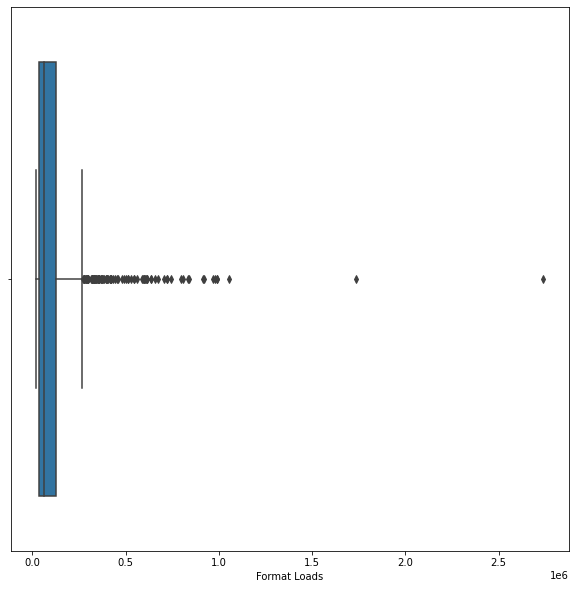

In [39]:
sns.boxplot(groupby_domains['Format Loads'])


- **I´ll take a deeper look into the Format Loads outliers by dividing the dataset into one with outliers and another without them**

In [41]:
#Calculatin the IQR
Q1 = groupby_domains['Format Loads'].quantile(0.25)
Q3 = groupby_domains['Format Loads'].quantile(0.75)
IQR = Q3 - Q1

#Obtaining the no outliers dataframe throught the IQR value
no_outliers = groupby_domains.copy()[~((groupby_domains['Format Loads']< (Q1 - 1.5 * IQR)) |(groupby_domains['Format Loads']> (Q3 + 1.5 * IQR)))]
no_outliers.dropna(inplace=True)
no_outliers['Outlier']=0

#Obtaining the  outliers dataframe
outliers = groupby_domains.merge(no_outliers,how='left').fillna(value=1)
outliers = outliers[outliers['Outlier']==1]
outliers.drop('Outlier',1,inplace=True)
no_outliers.drop('Outlier',1,inplace=True)

print('Number of outliers: ',outliers.shape[0])

Number of outliers:  92


In [45]:
outliers_by_region = alt.Chart(outliers).mark_circle().encode(
    x='Format Loads',
    y=alt.Y('Geographical zone',scale=alt.Scale(zero=False)),
    color='Geographical zone',
    tooltip='Domain',
    size='Format Loads'
).properties(title="Format Loads outliers by region",
    height=200,
    width = 1000).interactive()

outliers_by_region.save('Graphs/outliers_by_region.html')
outliers_by_region


alt.Chart(...)

In [46]:
display(no_outliers['Format Fill Rate'].mean())
display(outliers['Format Fill Rate'].mean())

10.17914411317408

10.399605542956222

**We can see that having a traffic above the mean doesn´t necesarily mean to have more impressions or a better format fill rate. In many cases the domain has very much traffic, but that traffic is from a country with a low income per capita, and the advertisers don´t use to invest in this domains**

**Of course in this context I have to take into account all the outliers in order to include in the cluster all the domains, especially those with different characasteristics**

#### ***DISTRIBUTION OF THE THREE VARIABLES***

In [55]:
hist_fl = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Format Loads', bin=alt.Bin(maxbins=30)),
    y='count()',
).properties(
    width=300,
    height=250,
    title="Format Loads  distribution"
)

hist_impressions = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Impressions', bin=alt.Bin(maxbins=30)),
    y='count()',
).properties(
    width=300,
    height=250,
    title="Impressions distribution"
)

hist_flrate = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Format Fill Rate', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    width=300,
    height=250,
    title="Format Fill Rate distribution"
)

features_distribution1 = hist_fl | hist_impressions | hist_flrate
features_distribution1.save('Graphs/features_distribution1.html')

features_distribution1

alt.HConcatChart(...)

**We can observed that around 600 domains(66%) have between 0-100.000 Format Loads, 0-10.000 Impressions, and 0-10% Format Fill Rate**

**In the Format Fill Rate we can see that a very few domains take values between 100-120%. It can be possible that a Domain has more Impressions than Format Loads, one user can have more than one impressions. When this happen is because there´s a strong campaign behind.**

#### ***TRAFFIC BY COUNTRY***

In [50]:
traffic_bycountry = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Country', sort=alt.Sort(op="count",order="descending")),
    y='sum(Format Loads)',
    color= 'Geographical zone'
).properties(
    width=800,
    height=250,
    title=" Daily global traffic by Country"
)

traffic_bycountry.save('Graphs/traffic_bycountry.html')

traffic_bycountry

alt.Chart(...)

- ## Categorical features interpretation

In [56]:
hist_regions = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Geographical zone', sort=alt.Sort(op="count",order="descending")),
    y='count()',
).properties(
    width=300,
    height=250,
    title="Regions distribution"
).interactive()

hist_cat = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Category', sort=alt.Sort(op="count",order="descending")),
    y='count()',
).properties(
    width=400,
    height=250,
    title="Category distribution"
).interactive()

features_distribution2 = hist_regions | hist_cat
features_distribution2.save('Graphs/features_distribution2.html')
features_distribution2


alt.HConcatChart(...)

**The distribution of regions and categories is really unbalanced. About 55% of the domains have a traffic from South America, and 50% are News&Portals. 
However, these  are between the most important features for the clustering, because advertisers usually want to filter by region and category.**

In [75]:
categories_byregion = alt.Chart(groupby_domains).mark_bar().encode(
    x='count():Q',
    y='Geographical zone',
    color='Category',
    tooltip='Category'
).properties(
    width=1000,
    height= 300,
    title = 'Categories distribution by region'
)


categories_byregion.save('Graphs/categories_byregion.html')


categories_byregion

alt.Chart(...)

In [80]:
hist_vr = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Viewability Rate', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    title="Viewability Rate distribution"
)

hist_er = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Efficiency Rate', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    title="Efficiency Rate distribution"
)


hist_cpm = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('CPM', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    title="CPM distribution"
)


hist_ctr = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('CTR', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    title="CTR distribution"
)

hist_clicks = alt.Chart(groupby_domains).mark_bar().encode(
    x=alt.X('Clicks', bin=alt.Bin(maxbins=20)),
    y='count()',
).properties(
    title="Clicks distribution"
)

features_distribution3 = (hist_vr | hist_er) & (hist_cpm | hist_ctr) & (hist_clicks)
features_distribution3.save('Graphs/features_distribution3.html')
features_distribution3

alt.VConcatChart(...)

- **The distribution of the rest of the features confirm the big data concentration**